In [1]:
# Importing the nesscary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datetime
import math as ma

In [2]:
# Readind the excel file
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df = pd.read_excel(xls,'NewCustomerList')

In [3]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.74375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.58,0.5800,0.7250,0.61625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.01000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.93,1.1625,1.1625,1.16250,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.57,0.5700,0.7125,0.71250,4,4,1.703125


In [4]:
df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [5]:
# Checking null or nan values in the dataset
df.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [6]:
# Checking unique value in each column of the dataset
for col in df:
    print(df[col].nunique())

940
961
3
100
958
184
9
3
1
2
23
1000
522
3
1
12
71
131
188
333
324
324
324


In [7]:
# Anaylzing gender against the bike bought
# The values in gender columns are [Female,Male,U,Femal,F,M]
# we will define a gender array first
gender = [0,0,0] #(0 index is for female,1 is for Male, 2 is for U or Unknown)
for each in df['gender']:
    if (each=='Female') or (each=='F') or (each=='Femal'):
        gender[0] += 1
    elif (each=='Male') or (each=='M'):
        gender[1] += 1
    else:
        gender[2] += 1
        
print(gender)

# Now check the total number of bike bought on the basis of gender
bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum() + df['past_3_years_bike_related_purchases'][df['gender']=='Femal'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

print(bike)

# We will make another list that will be useful for visualization of the results
graph0 = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
print(graph0)

[513, 470, 17]
[25212, 23765, 859]
[513, 25212, 470, 23765, 17, 859]


([<matplotlib.axis.XTick at 0x15d14642790>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

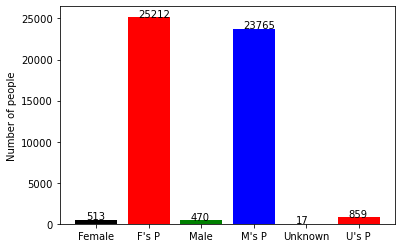

In [8]:
# Now we will visualize the result in matplotlib
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)
formatter = FuncFormatter(gf)
colorr = (0.3,0.1,0.4,0.6)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graph0, color=['black', 'red', 'green', 'blue'])
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graph0[i]+0.1, s = graph0[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x15d149502e0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

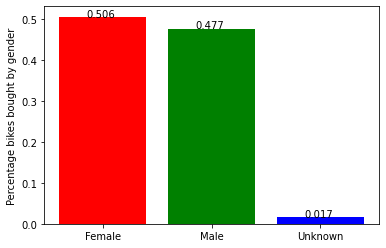

In [9]:
# Now we will plot thi information in terms of averge per gender
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = ['red','green','blue'])
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [10]:
# Now first we will create the age column and add it into our dataset
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['age'] = df['DOB'].apply(lambda x: from_dob_to_age(x))

In [11]:
df['age'] = df['age'].fillna(0).astype(int)

In [12]:
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.56,0.7000,0.87500,0.743750,1,1,1.718750,63
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.58,0.5800,0.72500,0.616250,1,1,1.718750,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,1.01,1.0100,1.01000,1.010000,1,1,1.718750,46
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.93,1.1625,1.16250,1.162500,4,4,1.703125,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.57,0.5700,0.71250,0.712500,4,4,1.703125,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,0.93,0.9300,0.93000,0.930000,996,996,0.374000,61
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.74,0.7400,0.92500,0.786250,997,997,0.357000,19
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.53,0.6625,0.66250,0.662500,997,997,0.357000,66
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.68,0.8500,0.85000,0.722500,997,997,0.357000,68


In [13]:
#  we want to analyize age vs bike bought so we have an clear idea about the demographic group
# for that we will find the mean and standered deviation of the age column on the basis of gender

age_group_gender = [0,0,0]
j = 0
total_sum = 0
stdv = []

for each in df['gender']:
    if each[0] == 'F' and df['age'][j] != 0:
        age_group_gender[0] += 1
        total_sum += df['age'][j]
        stdv.append((df['age'][j]))
    elif each[0] == 'M' and df['age'][j] != 0:
        age_group_gender[1] += 1
        total_sum += df['age'][j]
        stdv.append((df['age'][j]))
    elif df['age'][j] != 0:
        age_group_gender[2] += 1
        total_sum += df['age'][j]
        stdv.append((df['age'][j]))
    j+=1

print(total_sum)
print(age_group_gender)
#print(stand_deviation)
# Calculate the mean age
mean_age = round(total_sum/sum(age_group_gender),0)
print(mean_age)
stdv_val = round(ma.sqrt(1/(sum(age_group_gender)-1)*sum((stdv - (total_sum/sum(age_group_gender)))**2)),0)
print(stdv_val)

48679
[513, 470, 0]
50.0
17.0


In [14]:
age_dict = {}
f1  = []
bf1 = []
f2  = []
bf2 = []
f3  = []
bf3 = []
f4  = []
bf4 = []
m1  = []
bm1 = []
m2  = []
bm2 = []
m3  = []
bm3 = []
m4  = []
bm4 = []
fq = mean_age - stdv_val/2
sq = mean_age
tq = mean_age + stdv_val/2
print(fq, sq, tq)
jjj = 0
for each in df['gender']:
    temp = int(df['age'][jjj])
    bkt  = int(df['past_3_years_bike_related_purchases'][jjj])
    if each[0] == "F" and temp != 0:
        if(temp <= fq):
            f1.append(temp)
            bf1.append(bkt)
        elif(fq < temp and temp <= sq):
            f2.append(temp)
            bf2.append(bkt)
        elif(sq < temp and temp <= tq):
            f3.append(temp)
            bf3.append(bkt)
        elif(tq < temp):
            f4.append(temp)
            bf4.append(bkt)
    elif each[0] == "M" and temp != 0:
        if(temp <= fq):
            m1.append(temp)
            bm1.append(bkt)
        elif(fq < temp and temp <= sq):
            m2.append(temp)
            bm2.append(bkt)
        elif(sq < temp and temp <= tq):
            m3.append(temp)
            bm3.append(bkt)
        elif(tq < temp):
            m4.append(temp)
            bm4.append(bkt)
    jjj += 1
dtt = {"Female1":f1,
       "Female2":f2,
       "Female3":f3,
       "Female4":f4,
       "Male1":m1,
       "Male2":m2,
       "Male3":m3,
       "Male4":m4,
      }

41.5 50.0 58.5


In [15]:
print(len(dtt["Female1"]), len(dtt["Female2"]), len(dtt["Female3"]), len(dtt["Female4"]))
print(len(dtt["Male1"]), len(dtt["Male2"]), len(dtt["Male3"]), len(dtt["Male4"]))

154 113 77 169
158 92 63 157


([<matplotlib.axis.XTick at 0x15d149cf6d0>,
 [Text(0, 0, 'Fq1'),
  Text(1, 0, 'Mq1'),
  Text(2, 0, 'Fq2'),
  Text(3, 0, 'Mq2'),
  Text(4, 0, 'Fq3'),
  Text(5, 0, 'Mq3'),
  Text(6, 0, 'Fq4'),
  Text(7, 0, 'Mq4')])

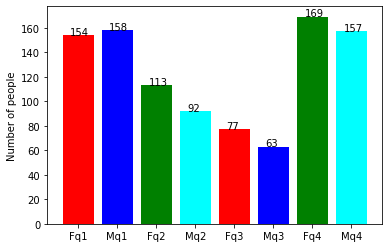

In [16]:
graphgen = [len(dtt["Female1"]), len(dtt["Male1"]), len(dtt["Female2"]), len(dtt["Male2"]), len(dtt["Female3"]), len(dtt["Male3"]), len(dtt["Female4"]), len(dtt["Male4"])]
x2 = np.arange(8)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Number of people')
plt.bar(x2, graphgen, color = ['red','blue','green','cyan'])
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('Fq1', "Mq1", 'Fq2', "Mq2", 'Fq3', "Mq3", 'Fq4', "Mq4"))

In [17]:
df['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

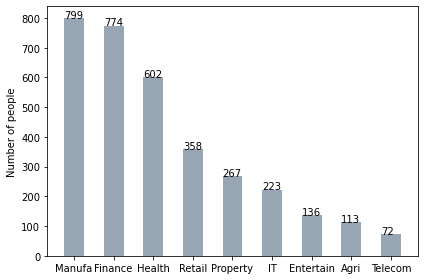

In [18]:
# We will visvualize this information for a better understanding
val = [799, 774, 602, 358, 267, 223, 136, 113, 72]
colorr = (0.2,0.3,0.4,0.5)

x3 = np.arange(9)
fig3, ax3 = plt.subplots()
ax3.set_ylabel('Number of people')
plt.bar(x3, val, color = colorr, width = 0.5)
for i in range(len(val)):
    plt.text(x = i-0.25, y = val[i]+0.1, s = val[i], size = 10)

plt.xticks(x3, ("Manufa", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))
plt.tight_layout()

In [19]:
df['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [20]:
#split into 3: M (Mass), H(High), A(Affluent)
jjj = 0
wsm = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsh = {"q1":[], "q2":[], "q3":[], "q4":[]}
wsa = {"q1":[], "q2":[], "q3":[], "q4":[]}

for each in df['wealth_segment']:
    temp = int(df['age'][jjj])
    if each[0] == "M" and temp != 0:
        if(temp <= fq):
            wsm["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsm["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsm["q3"].append(temp)
        elif(tq < temp):
            wsm["q4"].append(temp)
    elif each[0] == "H" and temp != 0:
        if(temp <= fq):
            wsh["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsh["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsh["q3"].append(temp)
        elif(tq < temp):
            wsh["q4"].append(temp)
    elif each[0] == "A" and temp != 0:
        if(temp <= fq):
            wsa["q1"].append(temp)
        elif(fq < temp and temp <= sq):
            wsa["q2"].append(temp)
        elif(sq < temp and temp <= tq):
            wsa["q3"].append(temp)
        elif(tq < temp):
            wsa["q3"].append(temp)
    jjj += 1
print(len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"]))
print(len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"]))
print(len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"]))

154 104 79 162
83 47 28 91
75 54 106 0


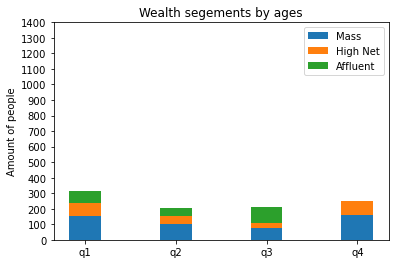

In [21]:
N = 4
wsmtp = [len(wsm["q1"]), len(wsm["q2"]), len(wsm["q3"]), len(wsm["q4"])]
wshtp = [len(wsh["q1"]), len(wsh["q2"]), len(wsh["q3"]), len(wsh["q4"])]
wsatp = [len(wsa["q1"]), len(wsa["q2"]), len(wsa["q3"]), len(wsa["q4"])]

bars = np.add(wsmtp, wshtp).tolist()
r = [0,1,2,3,4]

ind   = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wsmtp, width)
p2 = plt.bar(ind, wshtp, width,  bottom=wsmtp)
p3 = plt.bar(ind, wsatp, width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by ages')
plt.xticks(ind, ('q1', 'q2', 'q3', 'q4'))
plt.yticks(np.arange(0, 1500, 100))
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

In [23]:
df["state"].value_counts()
nsw_car = 0
nsw_nc  = 0
vic_car = 0
vic_nc  = 0
qld_car = 0
qld_nc  = 0
idx     = 0
for es in df["state"]:
    if es == "NSW":
        if df["owns_car"][idx] == "Yes":
            nsw_car += 1
        else:
            nsw_nc  += 1
    elif es == "VIC":
        if df["owns_car"][idx] == "Yes":
            vic_car += 1
        else:
            vic_nc  += 1
    elif es == "QLD":
        if df["owns_car"][idx] == "Yes":
            qld_car += 1
        else:
            qld_nc  += 1
    idx += 1

([<matplotlib.axis.XTick at 0x15d149af430>,
 [Text(0, 0, 'nsw_car'),
  Text(1, 0, 'nsw_nc'),
  Text(2, 0, 'vic_car'),
  Text(3, 0, 'vic_nc'),
  Text(4, 0, 'qld_car'),
  Text(5, 0, 'qld_nc')])

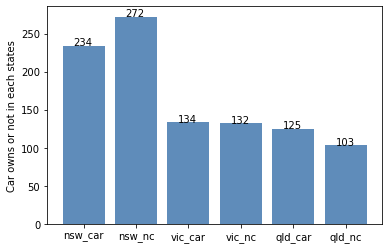

In [24]:
graphgen = [nsw_car, nsw_nc, vic_car, vic_nc, qld_car, qld_nc]
colorr = (0.3,0.5,0.7,0.9)

x2 = np.arange(6)
fig2, ax2 = plt.subplots()
ax2.set_ylabel('Car owns or not in each states')
plt.bar(x2, graphgen, color = colorr)
for i in range(len(graphgen)):
    plt.text(x = i-0.2, y = graphgen[i]+0.1, s = graphgen[i], size = 10)

plt.xticks(x2, ('nsw_car', "nsw_nc", 'vic_car', "vic_nc", 'qld_car', "qld_nc"))